# Analises Preditivas

## Carregando dados

In [46]:
#Importando bibliotecas necessarias.

import yfinance 
import pandas as pd

In [47]:
# Escolhendo a ação através de uma variável.
ticker = input("Digite o Ticker da Ação desejada: ")

Digite o Ticker da Ação desejada: petr4.sa


In [48]:
# variavel ação no periodo de 2 anos 
acao = yfinance.Ticker(ticker).history('2y')

In [49]:
acao.Close

Date
2020-12-09 00:00:00-03:00    12.796467
2020-12-10 00:00:00-03:00    13.214465
2020-12-11 00:00:00-03:00    13.095714
2020-12-14 00:00:00-03:00    13.119465
2020-12-15 00:00:00-03:00    13.228715
                               ...    
2022-12-05 00:00:00-03:00    25.620001
2022-12-06 00:00:00-03:00    25.639999
2022-12-07 00:00:00-03:00    25.350000
2022-12-08 00:00:00-03:00    24.780001
2022-12-09 00:00:00-03:00    24.709999
Name: Close, Length: 497, dtype: float64

<AxesSubplot:xlabel='Date'>

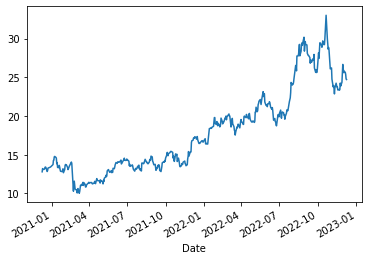

In [50]:
acao.Close.plot()

## Tratando os Dados

In [51]:
dados = acao
dados

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-09 00:00:00-03:00,12.649217,12.810716,12.539967,12.796467,52448300,0.0,0
2020-12-10 00:00:00-03:00,12.915216,13.394965,12.886716,13.214465,97537100,0.0,0
2020-12-11 00:00:00-03:00,13.057714,13.223963,12.957964,13.095714,48334300,0.0,0
2020-12-14 00:00:00-03:00,13.314214,13.428214,13.119465,13.119465,53159500,0.0,0
2020-12-15 00:00:00-03:00,13.119465,13.295214,13.119465,13.228715,47208200,0.0,0
...,...,...,...,...,...,...,...
2022-12-05 00:00:00-03:00,26.000000,26.580000,25.549999,25.620001,56065400,0.0,0
2022-12-06 00:00:00-03:00,25.820000,26.389999,25.420000,25.639999,74991200,0.0,0
2022-12-07 00:00:00-03:00,25.340000,26.070000,25.270000,25.350000,57008400,0.0,0


In [62]:
#tranformando a Date de indice para coluna
dados = acao.reset_index()
dados

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-12-09 00:00:00-03:00,12.649217,12.810716,12.539967,12.796467,52448300,0.0,0
1,2020-12-10 00:00:00-03:00,12.915216,13.394965,12.886716,13.214465,97537100,0.0,0
2,2020-12-11 00:00:00-03:00,13.057714,13.223963,12.957964,13.095714,48334300,0.0,0
3,2020-12-14 00:00:00-03:00,13.314214,13.428214,13.119465,13.119465,53159500,0.0,0
4,2020-12-15 00:00:00-03:00,13.119465,13.295214,13.119465,13.228715,47208200,0.0,0
...,...,...,...,...,...,...,...,...
492,2022-12-05 00:00:00-03:00,26.000000,26.580000,25.549999,25.620001,56065400,0.0,0
493,2022-12-06 00:00:00-03:00,25.820000,26.389999,25.420000,25.639999,74991200,0.0,0
494,2022-12-07 00:00:00-03:00,25.340000,26.070000,25.270000,25.350000,57008400,0.0,0
495,2022-12-08 00:00:00-03:00,25.549999,25.790001,24.639999,24.780001,55567700,0.0,0


In [69]:
# selecionando apenas as colunas que será feita a previsão.
colunas = ['Date', 'Close']
dados = dados[colunas]
dados


,Date,Close
0,2020-12-09,12.796467
1,2020-12-10,13.214465
2,2020-12-11,13.095714
3,2020-12-14,13.119465
4,2020-12-15,13.228715
...,...,...
492,2022-12-05,25.620001
493,2022-12-06,25.639999
494,2022-12-07,25.350000
495,2022-12-08,24.780001


In [70]:
# Retirando o fuso Horario da Coluna Data
dados["Date"]= dados["Date"].dt.tz_localize(None)
dados

C:\Users\glauc\AppData\Local\Temp\ipykernel_9720\703368160.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Close
0,2020-12-09,12.796467
1,2020-12-10,13.214465
2,2020-12-11,13.095714
3,2020-12-14,13.119465
4,2020-12-15,13.228715
...,...,...
492,2022-12-05,25.620001
493,2022-12-06,25.639999
494,2022-12-07,25.350000
495,2022-12-08,24.780001


In [71]:
# Renomeando a coluna Date e Close para o padrão de treinamento
dados.columns = ['ds', "y"]
dados

,ds,y
0,2020-12-09,12.796467
1,2020-12-10,13.214465
2,2020-12-11,13.095714
3,2020-12-14,13.119465
4,2020-12-15,13.228715
...,...,...
492,2022-12-05,25.620001
493,2022-12-06,25.639999
494,2022-12-07,25.350000
495,2022-12-08,24.780001


## Treinando o modelo

In [56]:
# instalar a biblioteca Prophet

!pip install prophet

In [60]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [72]:
# Criando o modelo e treinando o conjunto de dados com apenas as duas colunas ds e y.
modelo = Prophet()
modelo.fit(dados)

18:35:22 - cmdstanpy - INFO - Chain [1] start processing
18:35:22 - cmdstanpy - INFO - Chain [1] done processing


In [73]:
#periodo de 90 dias para previsão
periodo = modelo.make_future_dataframe(90)

In [74]:
# previsão já com o modelo treinado
previsoes = modelo.predict(periodo)

In [75]:
# plotando o gráfico do modelo de previsões
plot_plotly(modelo, previsoes)